Raster data using rasterio

In [1]:
%matplotlib notebook

import numpy as np
import rasterio as rio
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from shapely.geometry.polygon import Polygon
from cartopy.feature import ShapelyFeature
import matplotlib.patches as mpatches
import elevation
import richdem as rd

In [2]:
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

In [5]:
dtm = rio.open('data_files/ni_dtm.tif')

print('{} opened in {} mode'.format(dem.name,dem.mode))
print('image has {} band(s)'.format(dem.count))
print('image size (width, height): {} x {}'.format(dem.width, dem.height))
print('band 1 dataype is {}'.format(dem.dtypes[0])) # note that the band name (Band 1) differs from the list index [0]

data_files/ni_dtm.tif opened in r mode
image has 1 band(s)
image size (width, height): 3559 x 2867
band 1 dataype is int16


In [6]:
print(dtm.bounds)

BoundingBox(left=188566.06416642142, bottom=309840.37988014915, right=366516.0641664214, top=453190.37988014915)


In [7]:
print(dtm.crs)

EPSG:29902


In [8]:
num_bands = dtm.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

Number of bands in image: 1



In [9]:
img = dtm.read()

In [10]:
print(img.shape) # returns a tuple with the number of image bands bands, image height, and image width.
print(img[0, dem.height // 2, dem.width // 2]) # note that // performs floor division, as indices have to be integers

(1, 2867, 3559)
1271


In [11]:
centeri, centerj = dtm.height // 2, dem.width // 2 # note that centeri corresponds to the row, and centerj the column
centerx, centery = dtm.transform * (centerj, centeri) # note the reversal here, from i,j to j,i
print(dtm.index(centerx, centery))
print((centeri, centerj) == dtm.index(centerx, centery)) # check that these are the same

(1433, 1779)
True


In [12]:
top, lft = dtm.index(centerx-500, centery+500)
bot, rgt = dtm.index(centerx+500, centery-500)

subset = dtm.read(window=((top, bot), (lft, rgt))) # format is (top, bottom), (left, right)

dtm.close() # remember to close the dem now that we're done with it.

In [21]:
with rio.open('data_files/ni_dtm.tif') as dtm:
    img = dtm.read()
    xmin, ymin, xmax, ymax = dem.bounds 

AttributeError: 'numpy.ndarray' object has no attribute 'bounds'

<IPython.core.display.Javascript object>


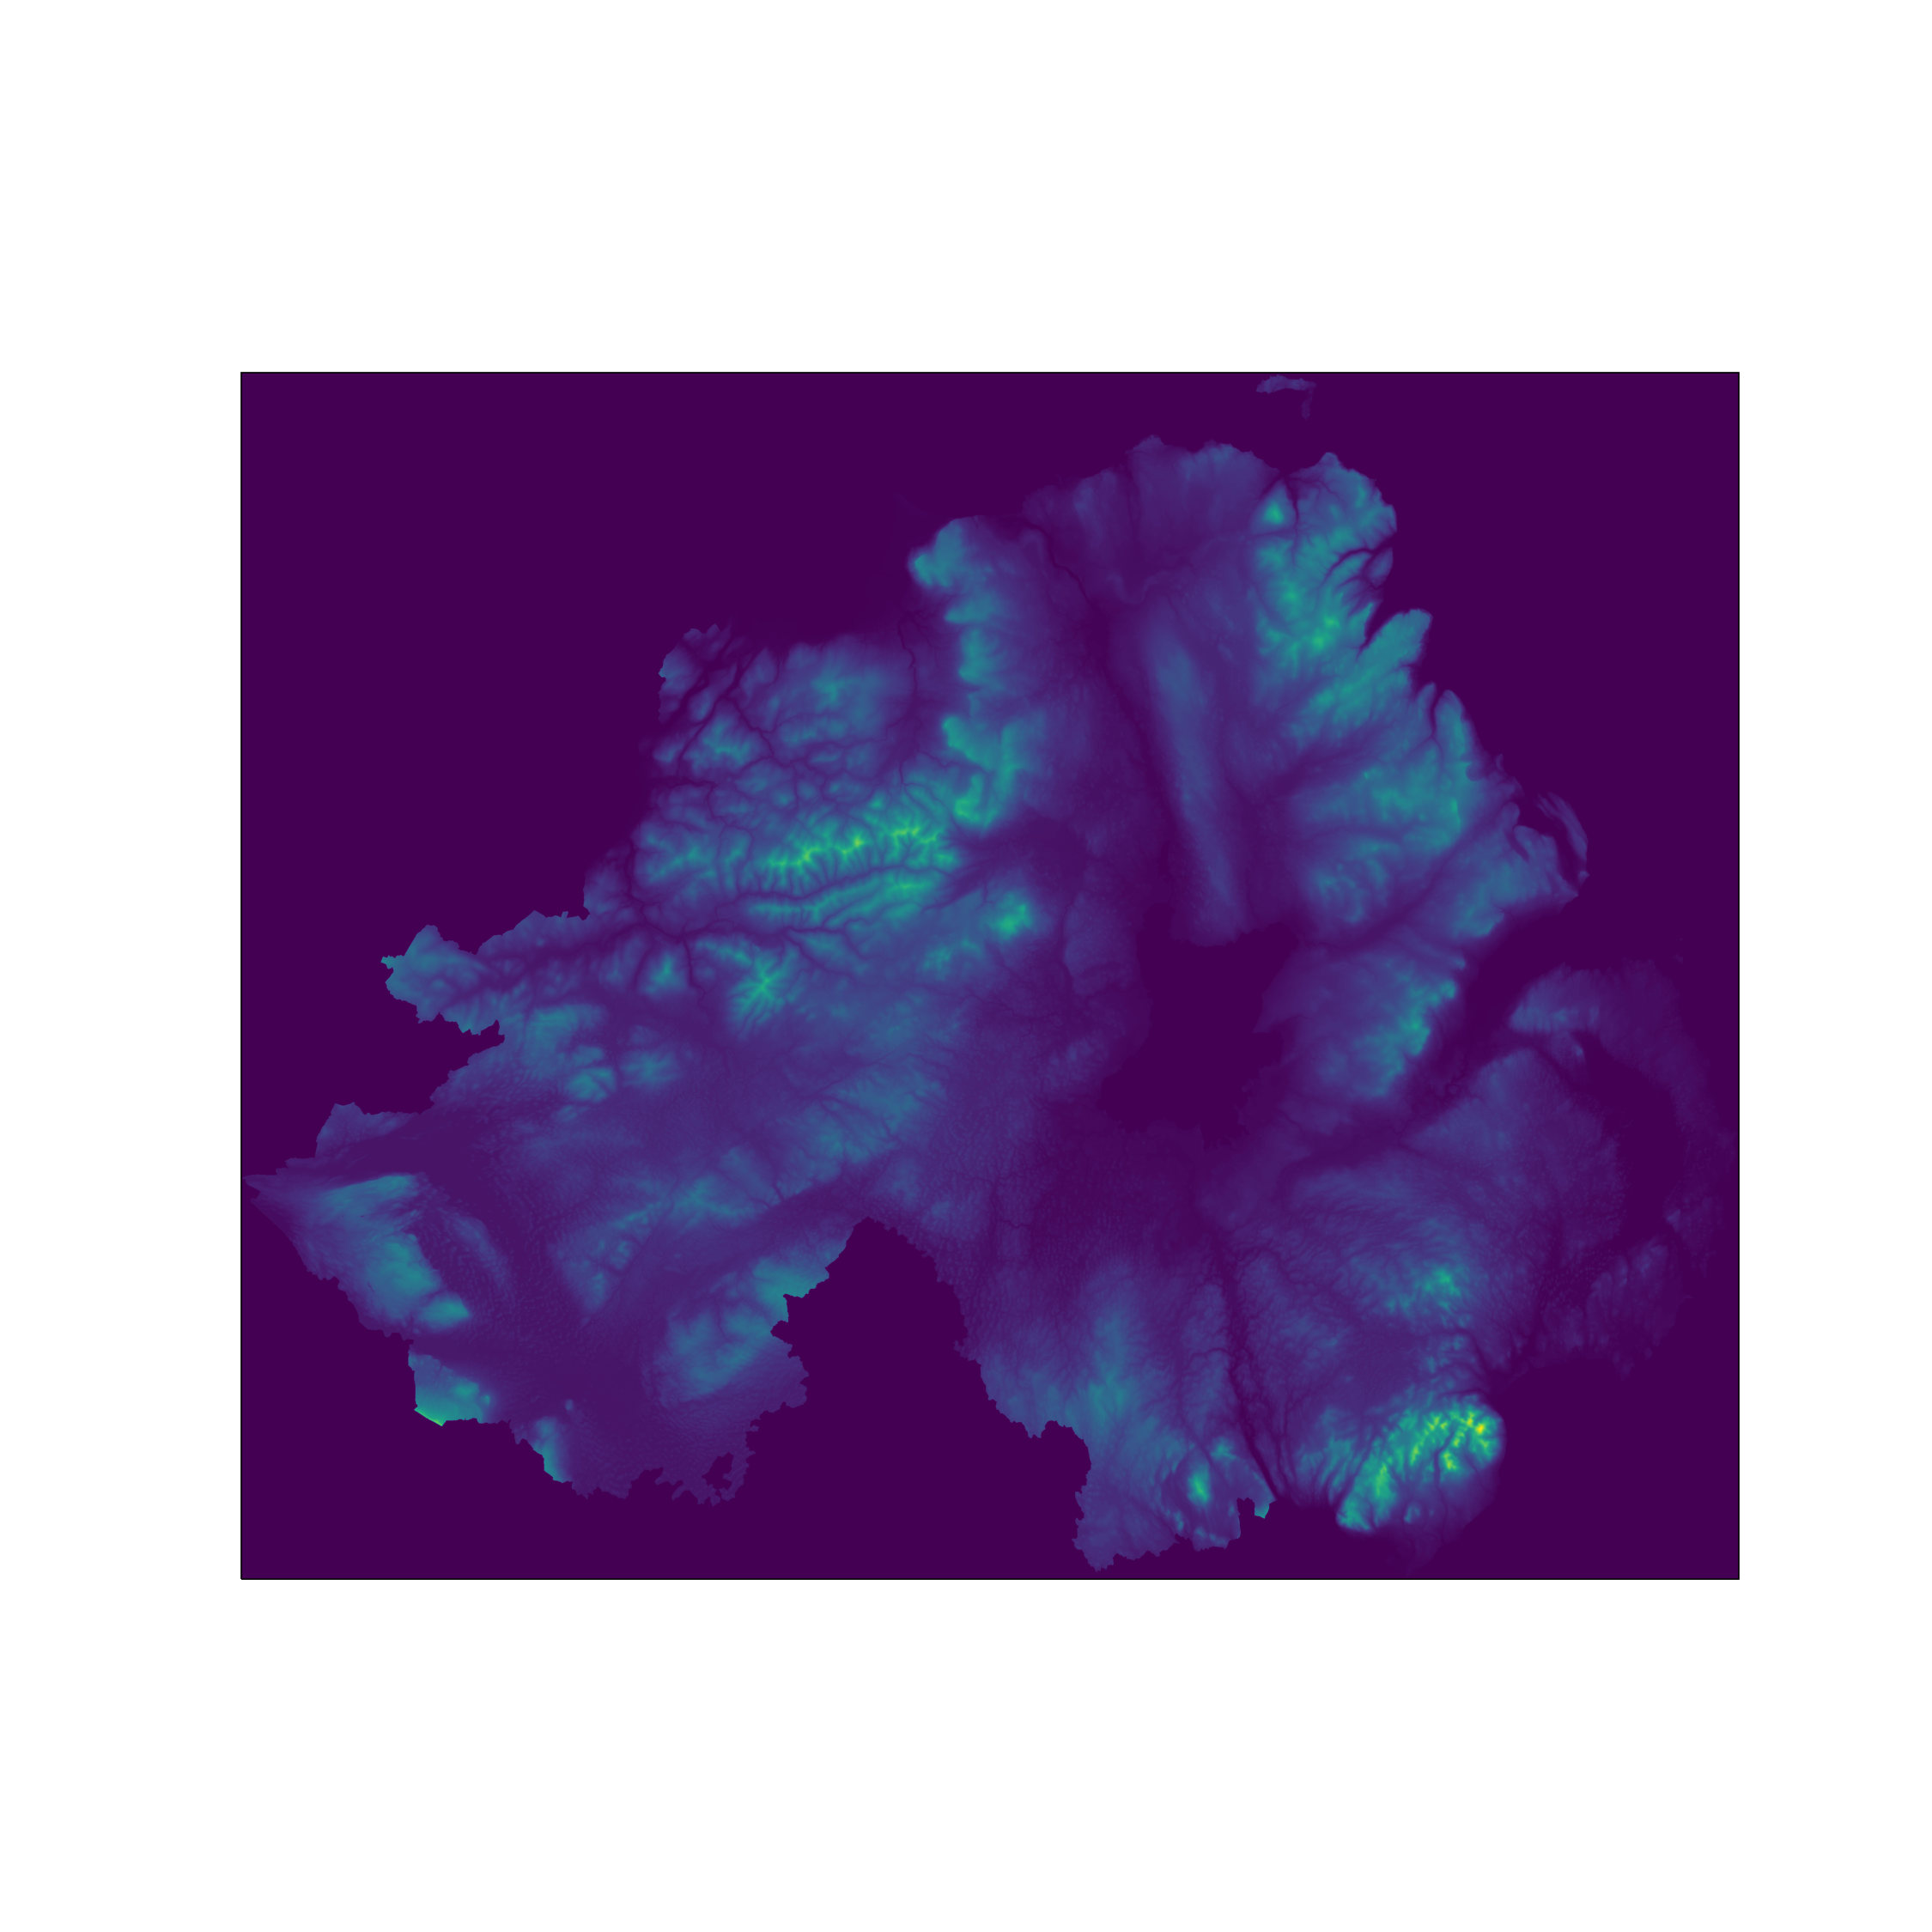

In [12]:
myCRS = ccrs.UTM(29) # note that this matches with the CRS of our image
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection=myCRS))

In [15]:
ax.imshow(img[0], cmap='gray', vmin=200, vmax=200)

NameError: name 'ax' is not defined

In [16]:
ax.imshow(img[0], cmap='gray', vmin=200, vmax=5000, transform=myCRS, extent=[xmin, xmax, ymin, ymax])

NameError: name 'ax' is not defined

In [17]:
ax.imshow(img[0], transform=myCRS, extent=[xmin, xmax, ymin, ymax])

NameError: name 'ax' is not defined

In [18]:
with rio.open('data_files/ni_dtm.tif') as dataset:
    dem = dataset.read(1)

In [19]:
dtm

<closed DatasetReader name='data_files/ni_dtm.tif' mode='r'>